In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns
%matplotlib inline

## Data Wrangling

In [2]:
df_usdfomc = pd.read_excel('USD_FOMC_Data.xlsx', skiprows=range(1))
header = df_usdfomc.iloc[0, :]
df_usdfomc.columns = header
df_usdfomc.index = df_usdfomc['S/N']
df_usdfomc.drop('S/N', inplace=True, axis=0)
df_usdfomc.drop('S/N', inplace=True, axis=1)

In [3]:
df_usdfomc.head()

,Month,Year,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
S/N,,,,,,,,,,,
1,January,2012,53.9,52.6,0,0.001,-47.8,200,0.085,0.002,0.0025
2,February,2012,54.1,56.8,0.002,0.004,-48.8,243,0.083,0.002,0.0025
3,March,2012,52.4,57.3,0.004,0.011,-52.6,227,0.083,0.001,0.0025
4,April,2012,53.4,56,0.003,0.008,-46,120,0.082,0.002,0.0025
5,May,2012,54.8,53.5,0,0.001,-51.8,115,0.081,0,0.0025


In [4]:
df = df_usdfomc.drop(['Month', 'Year'], axis=1)
df.head()

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
S/N,,,,,,,,,
1,53.9,52.6,0,0.001,-47.8,200,0.085,0.002,0.0025
2,54.1,56.8,0.002,0.004,-48.8,243,0.083,0.002,0.0025
3,52.4,57.3,0.004,0.011,-52.6,227,0.083,0.001,0.0025
4,53.4,56,0.003,0.008,-46,120,0.082,0.002,0.0025
5,54.8,53.5,0,0.001,-51.8,115,0.081,0,0.0025


In [5]:
df.dtypes

0
Man. PMI             object
Non-Man. PMI         object
CPI                  object
Retail Sales         object
Trading Balance      object
Employment Change    object
Uemployment Rate     object
Hourly Earning       object
FOMC Rates           object
dtype: object

In [6]:
df = df.astype(float)

## Exploaratory Analysis

In [7]:
df.corr(method ='pearson')

,Man. PMI,Non-Man. PMI,CPI,Retail Sales,Trading Balance,Employment Change,Uemployment Rate,Hourly Earning,FOMC Rates
0,,,,,,,,,
Man. PMI,1.000000,0.569402,0.045272,0.077324,-0.148790,0.089001,-0.189863,0.065144,0.295408
Non-Man. PMI,0.569402,1.000000,0.024034,0.053144,-0.262010,0.210160,-0.409789,0.170929,0.332231
CPI,0.045272,0.024034,1.000000,0.493933,0.006832,-0.036571,-0.084069,0.069496,0.128860
Retail Sales,0.077324,0.053144,0.493933,1.000000,0.052519,-0.178322,0.067764,0.183458,0.025666
Trading Balance,-0.148790,-0.262010,0.006832,0.052519,1.000000,-0.075780,0.395336,-0.152987,-0.665970
Employment Change,0.089001,0.210160,-0.036571,-0.178322,-0.075780,1.000000,-0.150738,-0.119484,-0.017103
Uemployment Rate,-0.189863,-0.409789,-0.084069,0.067764,0.395336,-0.150738,1.000000,-0.226608,-0.755454
Hourly Earning,0.065144,0.170929,0.069496,0.183458,-0.152987,-0.119484,-0.226608,1.000000,0.214013
FOMC Rates,0.295408,0.332231,0.128860,0.025666,-0.665970,-0.017103,-0.755454,0.214013,1.000000


In [8]:
lm = LinearRegression()

In [9]:
X = df[['Trading Balance', 'Uemployment Rate']]
#X = df[['Uemployment Rate']]
Y = df['FOMC Rates']

In [10]:
lm.fit(X,Y)
lm.score(X,Y)

0.7306213010927579

In [11]:
X = df.drop('FOMC Rates', axis=1)

lm.fit(X, Y)
lm.score(X, Y)

0.7803063842404532

In [13]:
lm.intercept_

-0.0008580004162946769

In [14]:
lm.coef_

array([ 4.08800915e-04, -3.96620188e-04,  1.79233023e-01,  5.36212920e-02,
       -6.40077906e-04, -1.48667810e-05, -3.07734419e-01, -5.51515726e-02])

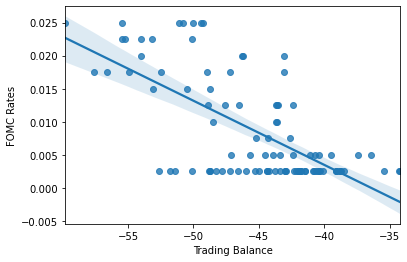

In [16]:
sns.regplot(x='Trading Balance', y='FOMC Rates', data=df)

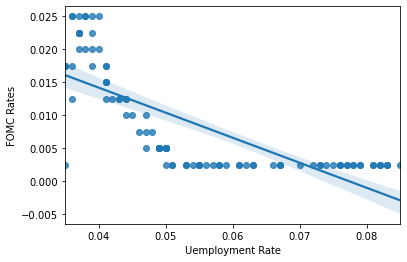

In [17]:
sns.regplot(x='Uemployment Rate', y='FOMC Rates', data=df)

In [69]:
pr=PolynomialFeatures(degree=7)

In [70]:
M = df[['Trading Balance', 'Uemployment Rate']]
M_poly = pr.fit_transform(M)

In [71]:
lm.fit(M_poly, Y)
lm.score(M_poly, Y)

0.899205677987824

In [78]:
pr_2 = PolynomialFeatures(degree=5)

In [79]:
N = df.drop('FOMC Rates', axis=1)
N_poly = pr_2.fit_transform(N)

In [80]:
lm.fit(N_poly, Y)
lm.score(N_poly, Y)

1.0